In [20]:
import geopandas
import os
import wget
import zipfile

In [25]:
# Url to poligons of national parks
url_path = "https://opendata.arcgis.com/datasets/beb04b0e5bed44da9e5407ea50477a5c_0.zip"

# Create the output directory
output_directory_base = "../data/parques_nacionales"
if not os.path.exists(output_directory_base):
    os.makedirs(output_directory_base, exist_ok=True)

raw_data = '../data/raw'
if not os.path.exists(raw_data):
    os.makedirs(raw_data, exist_ok=True)

# Download the data
output_directory = wget.download(url_path, out=raw_data)
# Unzip the data
with zipfile.ZipFile(output_directory, 'r') as zip_ref:
    zip_ref.extractall(output_directory_base)

# Rename all files to a common name
name = "data_parques"
for file in os.listdir(output_directory_base):
    os.rename(
        os.path.join(output_directory_base, file), 
        os.path.join(output_directory_base, name + os.path.splitext(file)[1])
    )

In [27]:
# Load files
df = geopandas.read_file(
    os.path.join(output_directory_base, name + ".shp")
)

<Axes: >

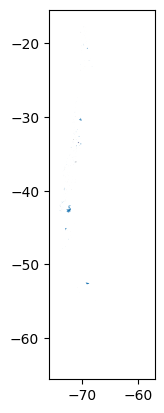

In [32]:
df.plot()